Cleaned Data:
   duration_min  wait_min
0      4.016667        80
1      2.150000        71
2      4.000000        57
3      4.000000        80
4      4.000000        75

--- HMM Analysis Results ---
Model converged: True

State 0 (Short Eruptions) Mean Duration: 1.99 mins
State 1 (Long Eruptions)  Mean Duration: 4.27 mins

Transition Matrix (from row state to column state):
            To Short   To Long
From Short  0.009507  0.990493
From Long   0.557222  0.442778


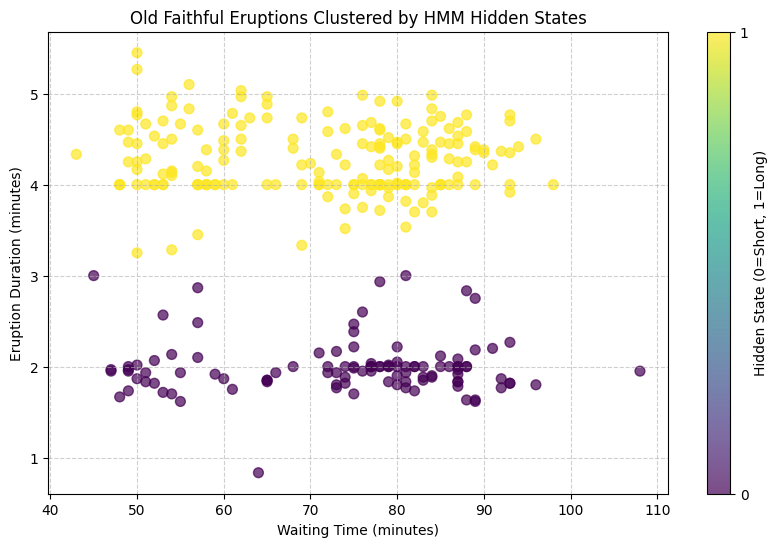

In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

durations_str = [
    "4:01", "2:09", "L", "L", "L", "S", "4:23", "4:17", "2:02", "4:50", "1:50", "5:27", "1:37", "4:52", "4:23", "1:46", "4:40", "S", "4:44", "4:13", "1:54", "4:58", "S", "L", "S", "L", "2:50", "4:30", "4:04", "3:43", "3:31", "4:28", "2:13", "4:53", "2:36", "4:09", "2:12", "4:46", "1:50", "4:36", "2:16", "4:08", "S", "L", "S", "L", "1:53", "4:16", "2:05", "4:28",
    "2:13", "4:00", "1:46", "4:20", "2:11", "4:29", "3:53", "3:20", "3:44", "4:00", "1:57", "5:16", "S", "L", "S", "L", "S", "L", "3:32", "2:10", "4:30", "2:01", "4:09", "4:12", "4:20", "1:56", "4:39", "3:49", "4:02", "4:10", "4:40", "1:49", "L", "M", "L", "S", "4:27", "2:03", "4:15", "1:55", "4:40", "1:44", "4:23", "1:46", "4:36", "1:52", "4:27", "1:38", "5:02", "1:49",
    "5:06", "1:38", "4:17", "S", "L", "S", "4:32", "2:00", "L", "2:56", "4:44", "3:54", "1:57", "4:07", "1:48", "4:40", "1:50", "4:42", "2:07", "4:47", "1:49", "4:06", "4:39", "L", "S", "L", "L", "4:13", "4:08", "3:56", "3:45", "4:25", "2:28", "4:10", "3:48", "4:19", "3:52", "4:41", "1:42", "4:58", "4:16", "4:35", "L", "L", "L", "1:59", "4:36", "0:50", "4:55",
    "1:44", "4:35", "1:42", "4:45", "1:50", "4:30", "1:52", "4:27", "4:27", "4:00", "4:48", "L", "L", "S", "L", "1:56", "4:35", "2:00", "3:42", "2:52", "4:50", "3:27", "4:23", "1:48", "4:24", "2:29", "4:31", "2:06", "4:21", "4:22", "1:47", "4:55", "1:49", "L", "L", "L", "3:52", "1:51", "4:42", "2:01", "4:28", "1:52", "1:54", "4:15", "3:15", "1:53", "4:59", "1:51",
    "4:00", "1:58", "4:46", "L", "S", "L", "L", "2:23", "4:25", "4:13", "4:22", "2:00", "4:27", "1:45", "4:30", "1:37", "4:42", "2:34", "3:42", "4:14", "1:56", "4:21", "L", "L", "L", "4:13", "4:00", "4:08", "1:53", "4:28", "1:57", "4:13", "1:43", "4:27", "4:15", "3:58", "4:23", "1:58", "4:27", "1:55", "4:25", "M", "L", "S", "L", "3:17", "1:50", "4:37", "1:50",
    "4:37", "4:36", "4:15", "1:56", "4:59", "1:58", "4:18", "4:12", "4:32", "4:24", "4:37", "S", "L", "L", "L", "3:55", "S", "4:30", "1:48", "4:00", "2:45", "4:44", "3:58", "1:57", "4:58", "1:51", "4:48", "L", "L", "L", "L", "L", "L", "S", "L", "1:56", "4:20", "1:40", "4:46", "1:57", "4:41", "1:56", "4:25", "2:08", "4:05", "2:04", "L", "L", "S"
]

waiting_times_str = [
    "80", "71", "57", "80", "75", "77", "60", "86", "77", "56", "81", "50", "89", "54", "90", "73", "60", "83", "65", "82", "84", "54", "85", "58", "79", "57", "88", "68", "76", "78", "74", "85", "75", "65", "76", "58", "91", "50", "87", "48", "93", "54", "86", "53", "78", "52", "83", "60", "87", "49",
    "80", "60", "92", "43", "89", "60", "84", "69", "74", "71", "108", "50", "77", "57", "80", "61", "82", "48", "81", "73", "62", "79", "54", "80", "73", "81", "62", "81", "71", "79", "81", "74", "59", "81", "66", "87", "53", "80", "50", "87", "51", "82", "58", "81", "49", "92", "50", "88", "62", "93",
    "56", "89", "51", "79", "58", "82", "52", "88", "52", "78", "69", "75", "77", "53", "80", "55", "87", "53", "85", "61", "93", "54", "76", "80", "81", "59", "86", "78", "71", "77", "76", "94", "75", "50", "83", "82", "72", "77", "75", "65", "79", "72", "78", "77", "79", "75", "78", "64", "80", "49",
    "88", "54", "85", "51", "96", "50", "80", "78", "81", "72", "75", "78", "87", "69", "55", "83", "49", "82", "57", "84", "57", "84", "73", "78", "57", "79", "57", "90", "62", "87", "78", "52", "98", "48", "78", "79", "65", "84", "50", "83", "60", "80", "88", "50", "84", "76", "65", "89",
    "49", "88", "51", "78", "85", "65", "75", "77", "69", "92", "68", "87", "61", "81", "55", "93", "53", "84", "70", "73", "93", "50", "87", "77", "74", "72", "82", "74", "80", "49", "91", "53", "86", "49", "79", "89", "87", "76", "59", "89", "45", "93", "72", "71", "54", "79", "74", "65", "78",
    "57", "87", "72", "84", "47", "84", "57", "87", "68", "86", "75", "73", "53", "82", "93", "77", "54", "96", "48", "89", "63", "84", "76", "62", "83", "50", "85", "78", "78", "81", "78", "76", "74", "81", "66", "84", "48", "93", "47", "87", "51", "78", "54", "87", "52", "85", "58", "88", "79"
]

def prepare_data(durations_str, waiting_times_str):
    """Cleans and converts the raw Old Faithful data into a numerical format."""
    
    cleaned_durations = []
    cleaned_waits = []
    
    for d, w in zip(durations_str, waiting_times_str):
        duration_val = 0
        if ':' in d:
            minutes, seconds = map(int, d.split(':'))
            duration_val = minutes + seconds / 60
        elif d == 'S':
            duration_val = 2.0
        elif d == 'L':
            duration_val = 4.0
        elif d == 'M':
            duration_val = 3.0
        
        cleaned_durations.append(duration_val)
        cleaned_waits.append(int(w))
    
    df = pd.DataFrame({
        'duration_min': cleaned_durations,
        'wait_min': cleaned_waits
    })
    
    return df

geyser_df = prepare_data(durations_str, waiting_times_str)
print("Cleaned Data:")
print(geyser_df.head())

X = geyser_df[['duration_min']].values
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
model.fit(X)
hidden_states = model.predict(X)

print("\n--- HMM Analysis Results ---")
print(f"Model converged: {model.monitor_.converged}")
means = model.means_.flatten()
sorted_indices = np.argsort(means)
sorted_means = means[sorted_indices]
sorted_covars = model.covars_.flatten()[sorted_indices]
sorted_transmat = model.transmat_[sorted_indices, :][:, sorted_indices]
state_map = {sorted_indices[0]: 0, sorted_indices[1]: 1}
relabeled_states = np.array([state_map[s] for s in hidden_states])

print(f"\nState 0 (Short Eruptions) Mean Duration: {sorted_means[0]:.2f} mins")
print(f"State 1 (Long Eruptions)  Mean Duration: {sorted_means[1]:.2f} mins")
print("\nTransition Matrix (from row state to column state):")
print(pd.DataFrame(sorted_transmat, columns=["To Short", "To Long"], index=["From Short", "From Long"]))

plt.figure(figsize=(10, 6))
plt.scatter(geyser_df['wait_min'], geyser_df['duration_min'], c=relabeled_states, cmap='viridis', s=50, alpha=0.7)
plt.title('Old Faithful Eruptions Clustered by HMM Hidden States')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Eruption Duration (minutes)')
plt.colorbar(ticks=[0, 1], label='Hidden State (0=Short, 1=Long)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Training stable GMMHMM...


Model is not converging.  Current: 77.88811265191082 is not greater than 93.8895243309237. Delta is -16.00141167901289
Covariance of state #0, mixture #0 has a null eigenvalue.


Training complete.

--- GMMHMM Analysis Results (Stable) ---
Model converged: True

State 0 (Short Eruptions) Mean Duration: 2.19 mins
State 1 (Long Eruptions)  Mean Duration: 4.31 mins

Transition Matrix:
                 To Short-Mode  To Long-Mode
From Short-Mode       0.029032      0.970968
From Long-Mode        0.662333      0.337667


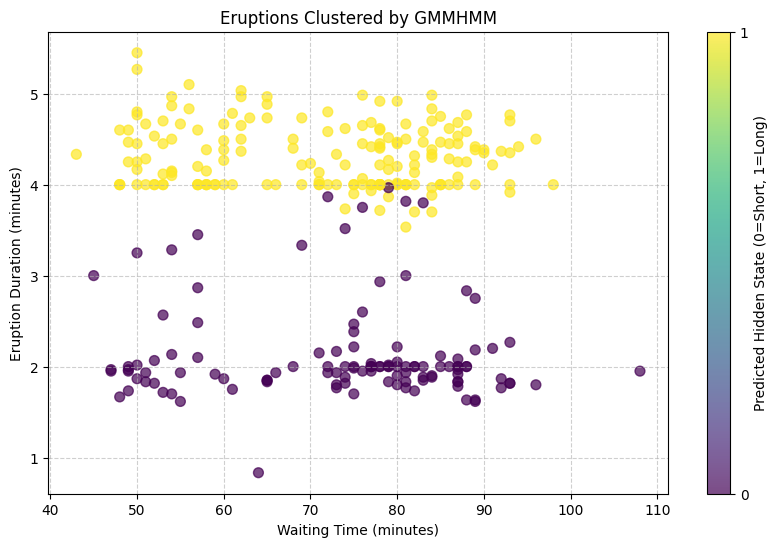

In [2]:
from scipy.stats import norm

X = geyser_df[['duration_min']].values

model = hmm.GMMHMM(n_components=2, n_mix=2, covariance_type="full", 
                   n_iter=100, random_state=42, min_covar=1e-3)

print("Training stable GMMHMM...")
model.fit(X)
print("Training complete.")

hidden_states = model.predict(X)

print("\n--- GMMHMM Analysis Results (Stable) ---")
print(f"Model converged: {model.monitor_.converged}")

weighted_means = np.sum(model.weights_ * model.means_[:, :, 0], axis=1)
sorted_indices = np.argsort(weighted_means)

state_map = {sorted_indices[0]: 0, sorted_indices[1]: 1}
relabeled_states = np.array([state_map[s] for s in hidden_states])

print(f"\nState 0 (Short Eruptions) Mean Duration: {weighted_means[sorted_indices[0]]:.2f} mins")
print(f"State 1 (Long Eruptions)  Mean Duration: {weighted_means[sorted_indices[1]]:.2f} mins")

sorted_transmat = model.transmat_[sorted_indices, :][:, sorted_indices]
print("\nTransition Matrix:")
print(pd.DataFrame(sorted_transmat, 
                   columns=["To Short-Mode", "To Long-Mode"], 
                   index=["From Short-Mode", "From Long-Mode"]))

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(geyser_df['wait_min'], geyser_df['duration_min'], c=relabeled_states, cmap='viridis', s=50, alpha=0.7)
ax.set_title('Eruptions Clustered by GMMHMM')
ax.set_xlabel('Waiting Time (minutes)')
ax.set_ylabel('Eruption Duration (minutes)')
ax.grid(True, linestyle='--', alpha=0.6)

cbar = plt.colorbar(ax.collections[0], ticks=[0, 1])
cbar.set_label('Predicted Hidden State (0=Short, 1=Long)')

plt.show()

In [3]:
from hmmlearn import hmm

X = geyser_df[['duration_min']].values

gauss_model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
gauss_model.fit(X)

gmm_model = hmm.GMMHMM(n_components=2, n_mix=2, covariance_type="full", 
                       n_iter=100, random_state=42, min_covar=1e-3)
gmm_model.fit(X)

def calculate_aic_bic(model, data, n_params):
    """Calculates AIC and BIC for a trained hmmlearn model."""
    log_likelihood = model.score(data)
    n_samples = len(data)
    
    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n_samples) - 2 * log_likelihood
    
    return {
        'Log-Likelihood': log_likelihood,
        '# Parameters': n_params,
        'AIC': aic,
        'BIC': bic
    }


n_params_gauss = 7
n_params_gmm = 13

scores_gauss = calculate_aic_bic(gauss_model, X, n_params_gauss)
scores_gmm = calculate_aic_bic(gmm_model, X, n_params_gmm)

comparison_df = pd.DataFrame([scores_gauss, scores_gmm], index=['GaussianHMM', 'GMMHMM'])
print("\n--- Model Comparison ---")
print(comparison_df.round(2))

Model is not converging.  Current: 77.88811265191082 is not greater than 93.8895243309237. Delta is -16.00141167901289
Covariance of state #0, mixture #0 has a null eigenvalue.



--- Model Comparison ---
             Log-Likelihood  # Parameters     AIC     BIC
GaussianHMM         -241.17             7  496.34  522.15
GMMHMM                77.98            13 -129.96  -82.02
